In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
English_language = '/content/drive/MyDrive/English_language'

In [ ]:
Hindi_language = '/content/drive/MyDrive/Hindi_language'

In [ ]:
Chinese_language = '/content/drive/MyDrive/Chinese_language'

In [ ]:
def load_img(folder):
  images = []
  for i in os.listdir(folder): 
    img = cv2.imread(os.path.join(folder,i))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(1900,850))
    images.append(img)
  return images

In [ ]:
def get_array(folder):
  arrays = load_img(folder)
  arrays = np.array(arrays).reshape(-1,1900*850)
  return arrays

In [ ]:
English_language_images = load_img(English_language)
Hindi_language_images = load_img(Hindi_language)
Chinese_language_images = load_img(Chinese_language)

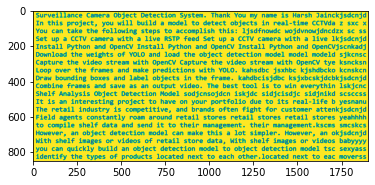

In [ ]:
plt.imshow(English_language_images[0])

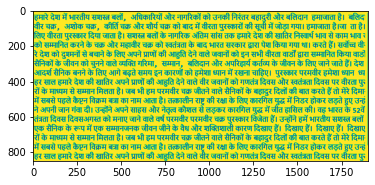

In [ ]:
plt.imshow(Hindi_language_images[0])

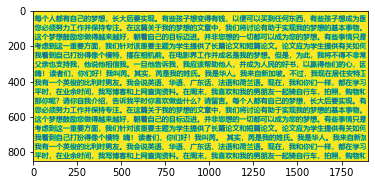

In [ ]:
plt.imshow(Chinese_language_images[0])

In [ ]:
x1 = get_array(English_language)
x1.shape
x2 = get_array(Hindi_language)
x2.shape
x3 = get_array(Chinese_language)
x3.shape
x = np.concatenate((x1,x2,x3), axis = 0)

In [ ]:
y0 = np.zeros(20)
y1 = np.ones(20)
y2 = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])
y = np.concatenate((y0,y1,y2), axis = 0)
y = y.reshape((60,1))
y.shape

(60, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.06)

In [ ]:
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
x_train.shape

(56, 1615000)

In [ ]:
LDA = lda(n_components=2)

In [ ]:
LDA.fit(x_train,y_train)
z_score = LDA.transform(x_train)
z_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.03349545, -0.07772074],
       [ 0.43833082, -1.11943002],
       [-0.61183907, -1.19071291],
       [ 0.4838925 , -1.03258822],
       [ 0.30742478,  2.99769849],
       [ 1.21184007,  0.83727923],
       [-1.4060007 ,  0.35793829],
       [ 0.56025789, -0.92527698],
       [ 0.08349423,  1.94695143],
       [ 0.87844985,  0.8532596 ],
       [-2.13673073,  0.551151  ],
       [ 0.53291868, -0.79249989],
       [-1.62953321,  0.17680815],
       [ 0.5602093 ,  0.70762487],
       [ 0.60778225, -0.78386089],
       [-2.01676996, -1.360605  ],
       [ 0.63625828,  1.05800149],
       [-1.62010237,  0.38138672],
       [ 0.77905511,  0.85664692],
       [-0.181735  , -0.3273495 ],
       [-1.18734232,  0.04437686],
       [-0.25555115,  0.25204642],
       [ 0.20016675, -0.25509766],
       [ 2.17913834, -0.40734611],
       [ 0.95481572,  0.74813813],
       [-0.24987068, -0.27219676],
       [ 0.95820907,  0.45494738],
       [ 0.09767758, -2.06816822],
       [ 0.1608772 ,

In [ ]:
z_score.shape

(56, 2)

In [ ]:
y_pred = LDA.predict(x_train)
y_pred

array([0., 1., 0., 1., 2., 2., 0., 1., 2., 2., 0., 1., 0., 2., 1., 0., 2.,
       0., 2., 1., 0., 0., 1., 2., 2., 0., 2., 1., 1., 2., 1., 2., 0., 0.,
       1., 0., 1., 2., 0., 2., 2., 0., 2., 0., 2., 1., 1., 2., 2., 0., 0.,
       2., 0., 1., 2., 0.])

In [ ]:
cm = confusion_matrix(y_pred,y_train)
cm

array([[14,  2,  4],
       [ 3, 11,  1],
       [ 2,  5, 14]])

In [ ]:
accuracy_score(y_pred,y_train)

0.6964285714285714

In [ ]:
x_test.shape
y_test.shape

(4, 1)

In [ ]:
y_pred = LDA.predict(x_test)
y_pred
accuracy_score(y_pred,y_test)

1.0

array([0., 1., 2., 1.])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 1]])

1.0

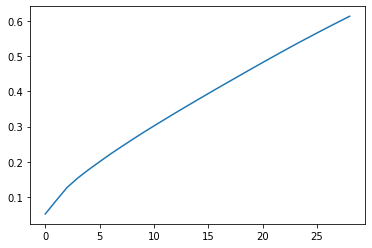

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.60)
pca.fit(x)
import numpy as np 
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
print(pca.explained_variance_)

[5.48183524e+08 4.06649152e+08 3.97343227e+08 2.92440735e+08
 2.54762376e+08 2.39165838e+08 2.34688934e+08 2.20651598e+08
 2.16556131e+08 2.13736792e+08 2.04246002e+08 2.01672090e+08
 2.00852849e+08 1.95344285e+08 1.95149805e+08 1.92830069e+08
 1.91648441e+08 1.89428116e+08 1.89138823e+08 1.88416470e+08
 1.86241286e+08 1.84849434e+08 1.83402191e+08 1.80452170e+08
 1.76611130e+08 1.74116602e+08 1.72846825e+08 1.68767197e+08
 1.67654125e+08]


In [ ]:
print(pca.explained_variance_ratio_)

[0.05124702 0.03801565 0.03714569 0.02733886 0.0238165  0.02235845
 0.02193993 0.02062765 0.02024478 0.01998121 0.01909397 0.01885334
 0.01877676 0.01826179 0.01824361 0.01802675 0.01791628 0.01770871
 0.01768167 0.01761414 0.01741079 0.01728068 0.01714538 0.0168696
 0.01651052 0.01627732 0.01615861 0.01577723 0.01567317]


In [ ]:
z_score = pca.transform(x)
print(z_score)

[[-23172.67876183 -16630.68502941   3999.87043413 ... -15922.44479032
   -4261.95908643  16940.55127224]
 [ -4990.63911497   1707.32077763  -1481.10365925 ...   4561.41956484
   -3651.67975475   7120.4258658 ]
 [-24406.23801251 -20065.20577904   7514.75908881 ... -15261.05273827
    2476.96166696 -26517.811639  ]
 ...
 [ 43196.42343794  -4408.24320895  -5854.8007905  ...   2358.61430104
   -4453.57868489   -914.31783185]
 [ 39297.92357719   -981.88772401 -14801.20919465 ...  -1897.72930948
   -4820.88455073   3577.38029322]
 [-20624.16118624   9657.41559598   4827.54671574 ...  -6261.36139269
    1801.07133669   -334.79950047]]


In [ ]:
LDA = lda(n_components=2)

In [ ]:
z_score = pd.DataFrame(z_score)

In [ ]:
z_score.shape

(60, 29)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z_score, y,
                                                    stratify=y, 
                                                    test_size=0.06)

In [ ]:
LDA.fit(x_train,y_train)
z_scores = LDA.transform(x_train)
z_scores

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1.88818728e+01,  5.68647381e-01],
       [-1.34494083e+01,  2.54615508e+00],
       [ 1.92073881e+01,  3.53838954e-01],
       [-1.21300883e+01,  2.95752336e+00],
       [ 1.97271873e+01,  2.24509955e-01],
       [-6.23889028e+00, -2.66923332e+00],
       [-1.17634041e+01,  1.97493299e+00],
       [-6.94504982e+00, -1.77414184e+00],
       [-1.12500519e+01,  1.92158809e+00],
       [-1.20971366e+01,  2.37005580e+00],
       [ 1.93237550e+01,  4.30237600e-02],
       [-6.78189532e+00, -2.62645971e+00],
       [ 1.92310476e+01,  2.59684878e-01],
       [-8.07001338e+00, -2.33263778e+00],
       [-1.15638640e+01,  2.97880236e+00],
       [ 1.94896835e+01, -1.43527061e-02],
       [-1.10834480e+01,  1.44018712e-01],
       [-5.07849114e+00, -1.41500396e+00],
       [-3.67229015e+00, -1.89922872e+00],
       [ 1.87639760e+01,  5.29625037e-01],
       [ 1.89202336e+01,  5.41925861e-01],
       [-5.68180313e+00, -1.50595822e+00],
       [ 1.89101126e+01,  1.76324959e-01],
       [-5.

In [ ]:
y_pred = LDA.predict(x_train)
y_pred
accuracy_score(y_pred,y_train)

0.9821428571428571

In [ ]:
y_pred = LDA.predict(x_test)
y_pred
accuracy_score(y_pred,y_test)

0.75